In [18]:
import pandas as pd
import numpy as np
# Read the text file
path = "D:\STUDY\Projects\iGEM_2024\Hardware\DC-Coil\\test2.txt"
with open(path, 'r') as file:
    data = file.read()

# Convert the string data to a list of lists
data_list = [line.split() for line in data.strip().split('\n')]

# Convert the list of lists to a numpy array
data_array = np.array(data_list, dtype=float)

# Create a DataFrame from the numpy array
df = pd.DataFrame(data_array, columns=['x', 'B'])

# Display the DataFrame
print(df.head(5))

          x         B
0  0.000000  0.021847
1  0.005334  0.021851
2  0.010667  0.021855
3  0.016001  0.021860
4  0.021335  0.021864


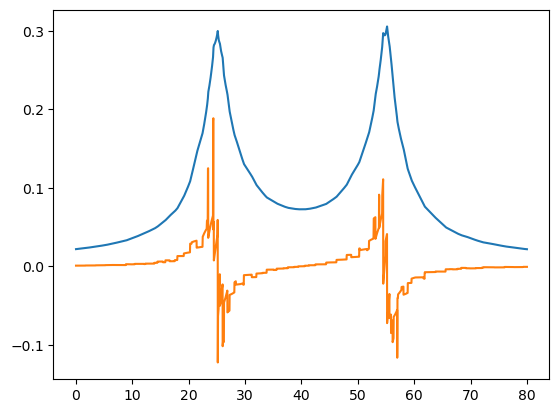

In [19]:
gradient = np.gradient(df['B'], df['x'])

import matplotlib.pyplot as plt
plt.plot(df['x'], df['B'])
plt.plot(df['x'], gradient)
plt.show()

Selected indices: RangeIndex(start=0, stop=15000, step=1)
Selected values of df['x']: 0         0.000000
1         0.005334
2         0.010667
3         0.016001
4         0.021335
           ...    
14995    79.978665
14996    79.983999
14997    79.989333
14998    79.994666
14999    80.000000
Name: x, Length: 15000, dtype: float64
Selected moving_average values: [0.3313195  0.33352874 0.33573798 ... 0.31014678 0.3067671  0.30338749]
Mean of selected moving_average values: 497.5587980386814


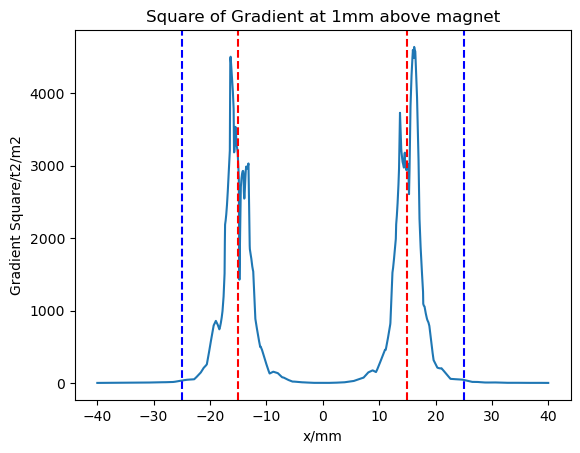

: 

In [36]:
gradient_square = np.square(gradient*1e3)
window_size = 300
moving_average = np.convolve(gradient_square, np.ones(window_size)/window_size, mode='same')


#plt.plot(df['x'], gradient_square)
plt.plot(df['x'] - 40, moving_average)
plt.axvline(x=-15, color='red', linestyle='--')
plt.axvline(x=15, color='red', linestyle='--')

plt.axvline(x=-25, color='blue', linestyle='--')
plt.axvline(x=25, color='blue', linestyle='--')

#print(blue_axvline_values)
selected_indices = df['x'].between(-24.9, -25.1).index
print("Selected indices:", selected_indices)

# Print corresponding values of df['x'] to check the selection
print("Selected values of df['x']:", df['x'][selected_indices])

# Select the moving_average values based on the correct indices
moving_average_at1cm = moving_average[selected_indices]
print("Selected moving_average values:", moving_average_at1cm)

# Calculate and print the mean of the selected moving_average values
mean_moving_average_at1cm = np.mean(moving_average_at1cm)
print("Mean of selected moving_average values:", mean_moving_average_at1cm)

plt.xlabel('x/mm')
plt.ylabel('Gradient Square/t2/m2')
plt.title('Square of Gradient at 1mm above magnet')
plt.show()
